In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [72]:
x = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]) # square
y = np.array([245, 312, 279, 308, 199, 219, 405, 324, 319, 255])
print('square =',x, '\n price =',y)

square = [1400 1600 1700 1875 1100 1550 2350 2450 1425 1700] 
 price = [245 312 279 308 199 219 405 324 319 255]


In [73]:
alpha = 10**(-7)
theta00 = 0
theta01 = 0
epochs = 100000
m = 10 # len(X)

theta0 = 0.05122283204969707
theta1 = 0.16405894667574164
J_alth = 927.8231142678515


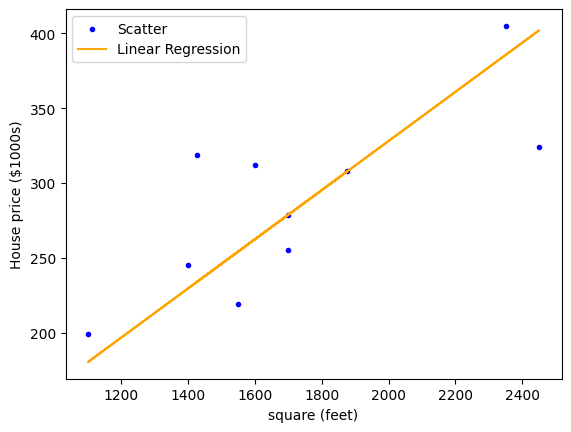

In [74]:
for i in range (epochs):
    temp00 = np.sum(theta00 + theta01 * x.T - y)/m         #theta0 - Alpha * (np.sum(error)) / m
    temp01 = np.sum((theta01 + theta01 * x.T - y)*x) / m
    theta00 = theta00 - alpha * temp00
    theta01 = theta01 - alpha * temp01
    J_alth = np.sum((theta00+theta01*x.T-y) ** 2) / (2 * m)

print('theta0 =',theta00)
print('theta1 =',theta01)
print('J_alth =',J_alth)

plt.scatter(x, y, color='blue', marker='.', label='Scatter')
plt.xlabel('square (feet)')
plt.ylabel('House price ($1000s)')
plt.plot(x, theta00 + theta01 * x, color='orange', label='Linear Regression')
plt.legend() 
plt.show()

theta0 = 51.15633901219968
theta1 = 0.1291857902939754
Sai số trung bình bình phương trên tập kiểm thử - MSE: 4973.274832886896
J_LR() =  807.9882829877274


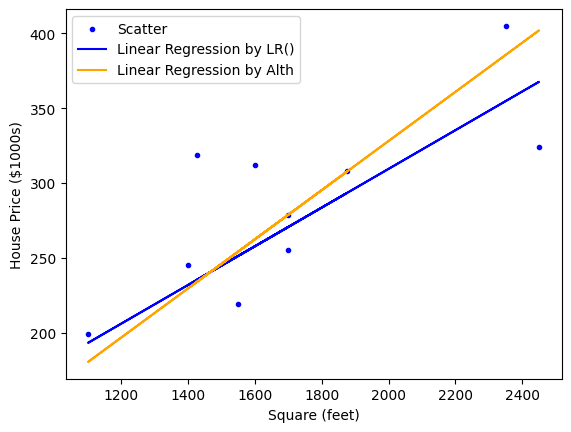

In [75]:
### LR().FIT()  --> kết quả dùng để so sánh với giải thuật thực thi

# Thực hiện Gradient Desent dùng thư viện LR()
GD = LR().fit(X_train, y_train)

# Hiển thị hệ số và sai số trung bình bình phương trên tập kiểm thử
print("theta0 =", GD.intercept_)
print("theta1 =", GD.coef_[0])
print("Sai số trung bình bình phương trên tập kiểm thử - MSE:", mean_squared_error(y_test, y_pred),)
J_LR = np.sum((GD.intercept_+GD.coef_[0]*x.T-y) ** 2) / (2 * m)
print('J_LR() = ',J_LR)

# Vẽ đồ thị
plt.scatter(x, y, color='blue', marker='.', label='Scatter')
plt.plot(x, GD.intercept_ + GD.coef_[0]* x , color='blue', label='Linear Regression by LR()')
plt.plot(x, theta00 + theta01* x, color='orange', label='Linear Regression by Alth')
plt.xlabel('Square (feet)')
plt.ylabel('House Price ($1000s)')
plt.legend()
plt.show()

In [76]:
### triển khai dạng 
print('\n x = ',x)
xt = x.reshape(-1, 1)    
print ('\n xt = ',xt)
X = np.hstack([np.ones((xt.shape[0], 1)), xt])
print('\n X =',X) 
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print('\n theta00 =',theta[0],' ;  theta01 =',theta[1])


 x =  [1400 1600 1700 1875 1100 1550 2350 2450 1425 1700]

 xt =  [[1400]
 [1600]
 [1700]
 [1875]
 [1100]
 [1550]
 [2350]
 [2450]
 [1425]
 [1700]]

 X = [[1.000e+00 1.400e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 1.700e+03]
 [1.000e+00 1.875e+03]
 [1.000e+00 1.100e+03]
 [1.000e+00 1.550e+03]
 [1.000e+00 2.350e+03]
 [1.000e+00 2.450e+03]
 [1.000e+00 1.425e+03]
 [1.000e+00 1.700e+03]]

 theta00 = 98.24832962138089  ;  theta01 = 0.10976773783009866


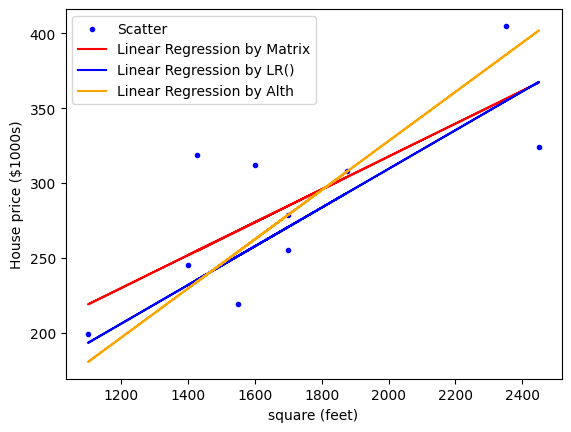

In [77]:
#for i in range (epochs):
    #temp00 = np.sum(theta00 + theta01 * x.T - y)/m #theta0 - Alpha * (np.sum(error)) / m
    #temp01 = np.sum((theta01 + theta01 * x.T - y)*x) / m
    #theta00 = theta00 - alpha * temp00
    #theta01 = theta01 - alpha * temp01
### nhiem vu:  dua cac pt trong for thanh dang matrix va chi 1 dong theta = ... (matran 2 bien)
### dung x_bar, them hang 1, scaling truoc khi them hang 1

J_matrix = np.sum((theta[0]+theta[1]*x.T-y) ** 2) / (2 * m)

plt.scatter(x, y, color='blue', marker='.', label='Scatter')
plt.xlabel('square (feet)')
plt.ylabel('House price ($1000s)')
plt.plot(x, theta[0] + theta[1]* x, color='red', label='Linear Regression by Matrix')
plt.plot(x, GD.predict(x.reshape(-1, 1)), color='blue', label='Linear Regression by LR()')
plt.plot(x, theta00 + theta01* x, color='orange', label='Linear Regression by Alth')
plt.legend()  # Hiển thị chú thích##
plt.show()

In [78]:
print('Khi dùng thư viện LinearRegression:\n- Hệ số theta0 =',GD.intercept_,'\n- Hệ số theta1 =', GD.coef_[0],'\n- J =', J_LR)

Khi dùng thư viện LinearRegression:
- Hệ số theta0 = 51.15633901219968 
- Hệ số theta1 = 0.1291857902939754 
- J = 807.9882829877274


In [79]:
print('Khi dùng Giải thuật lặp:\n- Hệ số theta0 =',theta00,'\n- Hệ số theta1 =', theta01,'\n- J =', J_alth)

Khi dùng Giải thuật lặp:
- Hệ số theta0 = 0.05122283204969707 
- Hệ số theta1 = 0.16405894667574164 
- J = 927.8231142678515


In [80]:
print('Khi dùng Dạng ma trận:\n- Hệ số theta0 =',theta[0],'\n- Hệ số theta1 =', theta[1],'\n- J =', J_matrix)

Khi dùng Dạng ma trận:
- Hệ số theta0 = 98.24832962138089 
- Hệ số theta1 = 0.10976773783009866 
- J = 683.2782612153991
